In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-9a9541e1-8389-f735-4dbf-e2ccceea1668)


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv


--2024-08-03 12:51:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2024-08-03 12:51:35 (8.91 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd

df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df.head()

Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC            123.65499       124.30466       124.75166   
2013-10-02      BTC            125.45500       123.65499       125.75850   
2013-10-03      BTC            108.58483       125.45500       125.66566   
2013-10-04      BTC            118.67466       108.58483       118.67500   
2013-10-05      BTC            121.33866       118.67466       121.93633   

            24h Low (USD)  
Date                       
2013-10-01      122.56349  
2013-10-02      123.63383  
2013-10-03       83.32833  
2013-10-04      107.05816  
2013-10-05      118.00566

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
len(df)

2787

In [ ]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

Price
Date                 
2013-10-01  123.65499
2013-10-02  125.45500
2013-10-03  108.58483
2013-10-04  118.67466
2013-10-05  121.33866

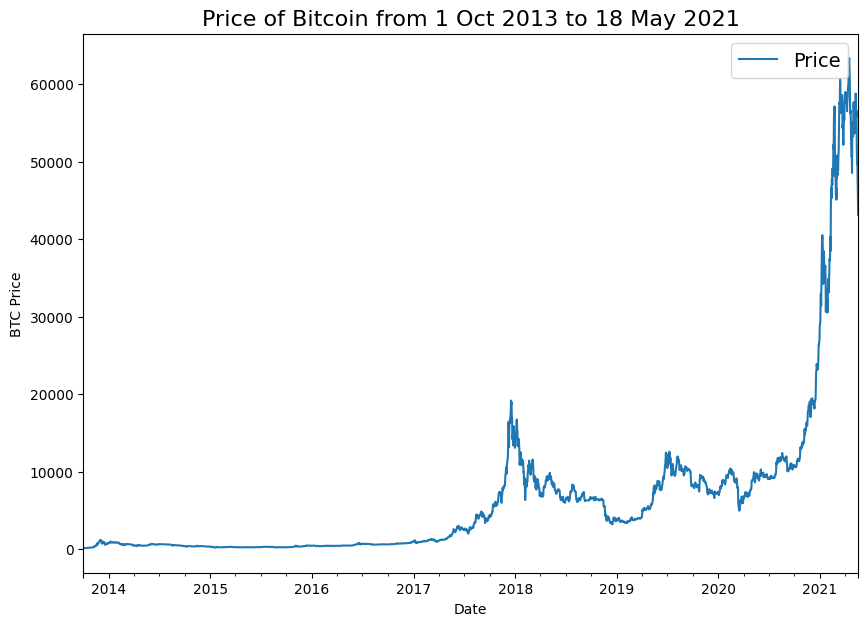

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [ ]:

import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[2]))


timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

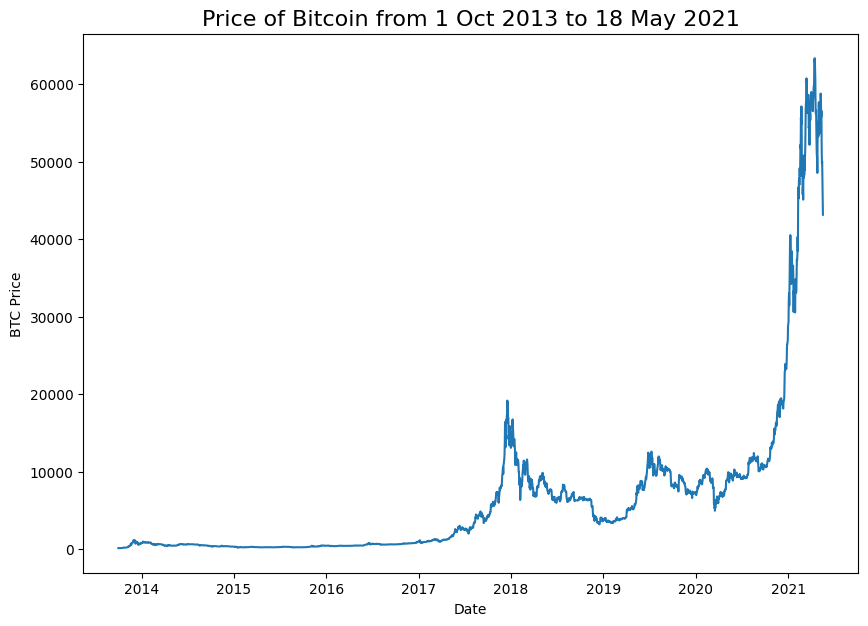

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

In [ ]:
prices=btc_price
split_size = int(0.8 * len(prices))


X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

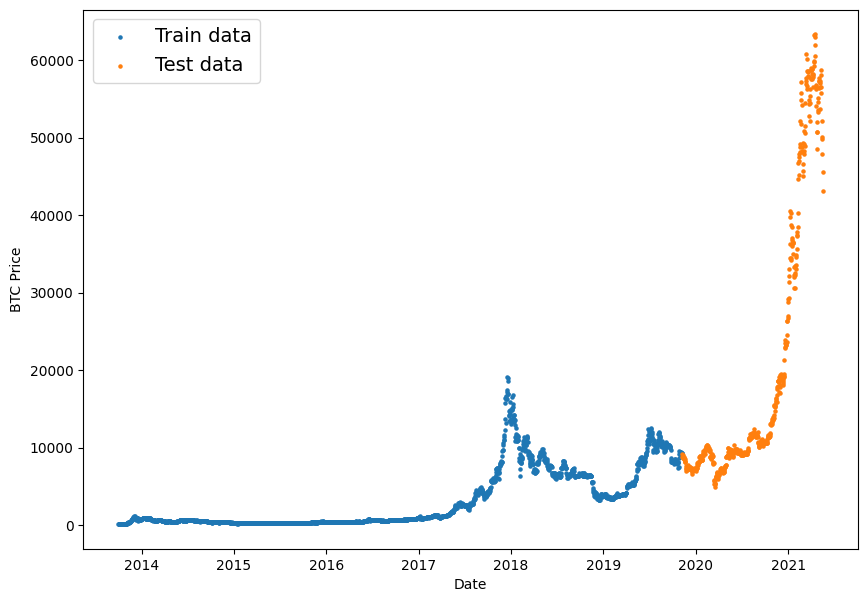

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();


In [ ]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

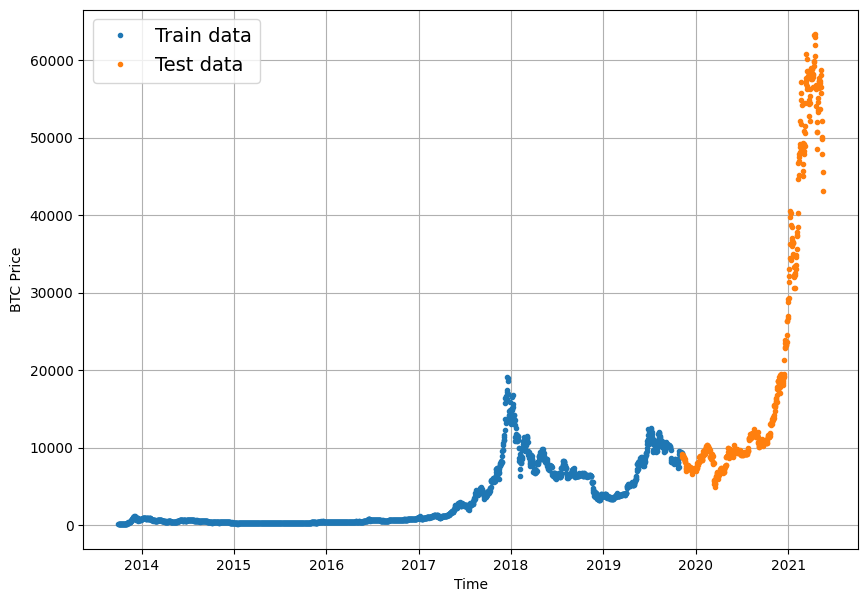

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")


#Naive Forecast


In [ ]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

([9226.4858208826,
  8794.3586445233,
  8798.0420546256,
  9081.1868784913,
  8711.5343391679,
  8760.8927181435,
  8749.520591019,
  8656.970922354,
  8500.6435581622,
  8469.2608988992],
 [57107.1206718864,
  58788.2096789273,
  58102.1914262342,
  55715.5466512869,
  56573.5554719043,
  52147.8211869823,
  49764.1320815975,
  50032.6931367648,
  47885.6252547166,
  45604.6157536131])

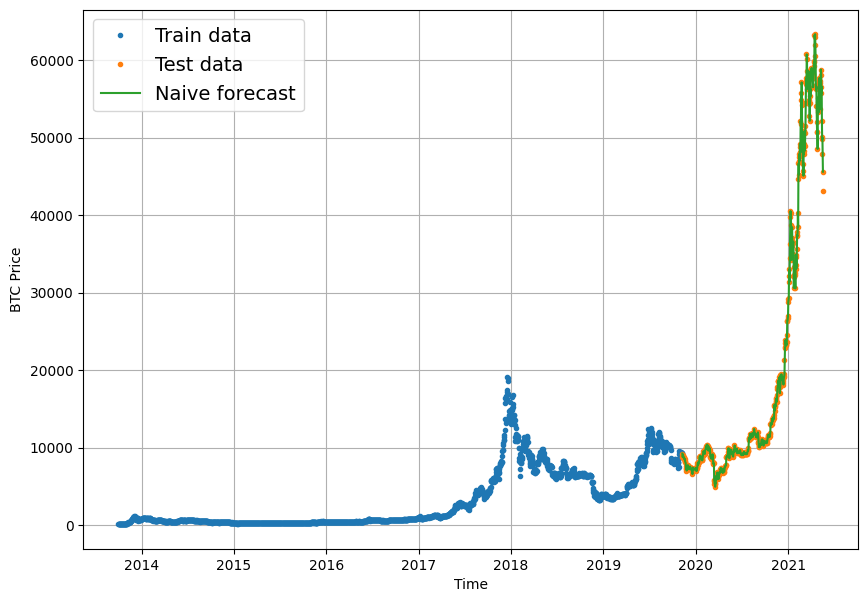

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

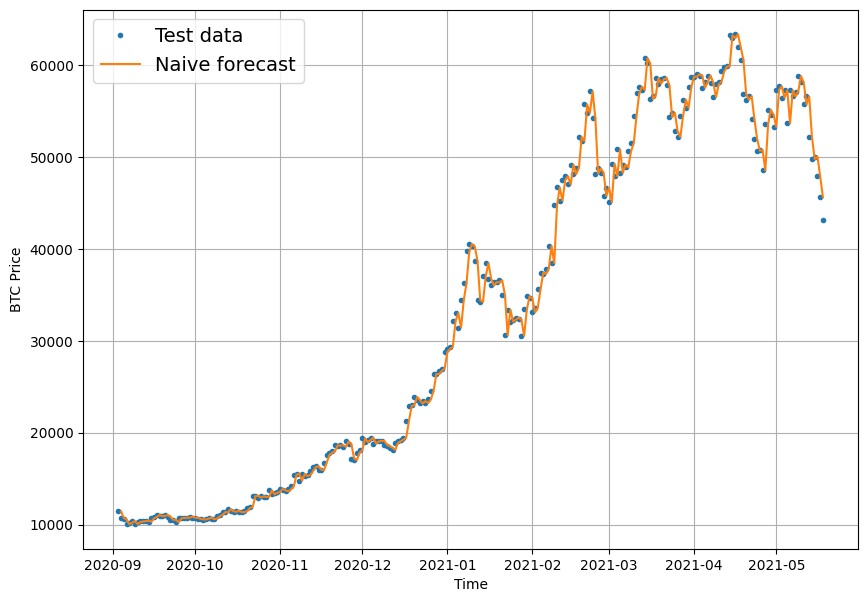

In [ ]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");


In [ ]:
import tensorflow as tf

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):

  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season

In [ ]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Create metric objects
    mae_metric = tf.keras.metrics.MeanAbsoluteError()
    mse_metric = tf.keras.metrics.MeanSquaredError()
    mape_metric = tf.keras.metrics.MeanAbsolutePercentageError()

    # Update state with the true and predicted values
    mae_metric.update_state(y_true, y_pred)
    mse_metric.update_state(y_true, y_pred)
    mape_metric.update_state(y_true, y_pred)

    # Calculate metrics
    mae = mae_metric.result().numpy()
    mse = mse_metric.result().numpy()
    rmse = tf.sqrt(mse).numpy()
    mape = mape_metric.result().numpy()
    mase = mean_absolute_scaled_error(y_true, y_pred).numpy()

    return {"mae": mae,
            "mse": mse,
            "rmse": rmse,
            "mape": mape,
            "mase": mase}

In [ ]:

naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
#avg price
tf.reduce_mean(y_test).numpy()

20056.635

In [ ]:

HORIZON = 1
WINDOW_SIZE = 7

In [ ]:

#labelling windowed data
def get_labelled_windows(x, horizon=1):

  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
import numpy as np

def make_windows(x, window_size=7, horizon=1):
    x = np.array(x)  # Ensure x is a NumPy array

    # Create a 2D array of window indices
    window_step = np.arange(window_size + horizon)
    window_indexes = window_step + np.arange(len(x) - (window_size + horizon - 1)).reshape(-1, 1)

    # Extract windows
    windows = np.array([x[idx] for idx in window_indexes])

    # Get labels (assuming get_labelled_windows is defined correctly)
    windows, labels = get_labelled_windows(windows, horizon=horizon)

    return windows, labels

def get_labelled_windows(windowed_array, horizon):
    # Assuming this function extracts labels from windows correctly
    # Example implementation (replace with actual logic):
    windows = windowed_array[:, :-horizon]
    labels = windowed_array[:, -horizon:]
    return windows, labels


In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


In [ ]:
#Windows into test and train datasets

In [ ]:
def make_train_test_splits(windows, labels, test_split=0.2):

  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:

train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [ ]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):

    filepath = os.path.join(save_path, f"{model_name}.keras")
    return tf.keras.callbacks.ModelCheckpoint(filepath=filepath,
                                              verbose=1,
                                              save_best_only=True)



#Model 1(window=7, horizon=1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 2966.2932 - mae: 2966.2932
Epoch 1: val_loss improved from inf to 3009.69409, saving model to model_experiments/model_1_dense.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - loss: 2927.2644 - mae: 2927.2644 - val_loss: 3009.6941 - val_mae: 3009.6941
Epoch 2/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - loss: 497.3368 - mae: 497.3368
Epoch 2: val_loss improved from 3009.69409 to 1063.80261, saving model to model_experiments/model_1_dense.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 372.9934 - mae: 372.9934 - val_loss: 1063.8026 - val_mae: 1063.8026
Epoch 3/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 170.2818 - mae: 170.2818
Epoch 3: val_loss improved from 1063.80261 to 953.32465, saving model to model_experiments/model_1_dense.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 213.4154 - mae: 213.4154 - val_loss: 953.3246 - val_mae: 953.3246
Epoch 4/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 176.4331 

In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 283.4937 - mae: 283.4937


[567.5486450195312, 567.5486450195312]

In [ ]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense.keras")
model_1.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 283.4937 - mae: 283.4937


[567.5486450195312, 567.5486450195312]

In [ ]:

def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8851.283, 8764.407, 9027.717, 8782.33 , 8715.099, 8736.17 ,
        8676.693, 8507.194, 8453.539, 8515.394], dtype=float32)>)

In [ ]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 567.54865,
 'mse': 1167432.0,
 'rmse': 1080.4777,
 'mape': 2.5410879,
 'mase': 0.9970258}

In [ ]:

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

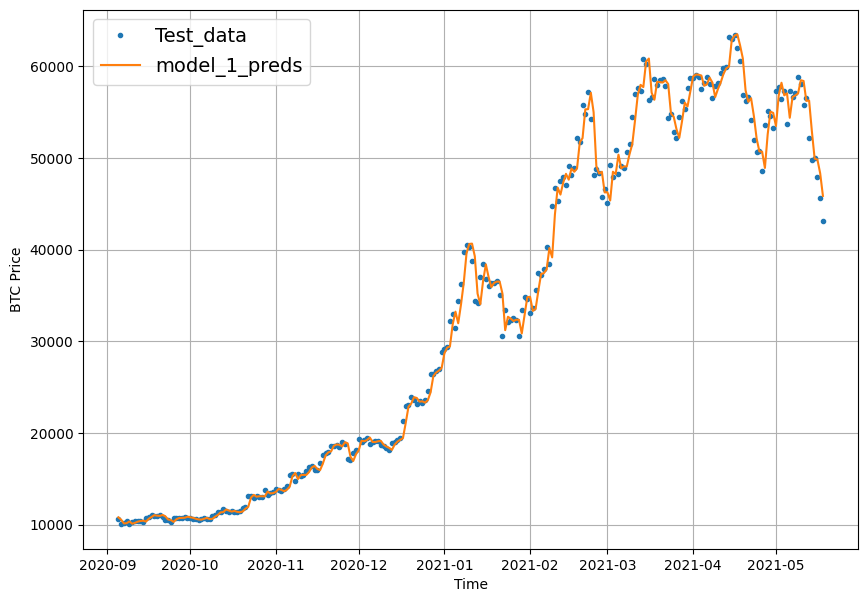

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")


#Model 2(window=30, horizon=1)

In [ ]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
#train and test data
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:

tf.random.set_seed(42)
# same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])


Epoch 1: val_loss improved from inf to 2015.91663, saving model to model_experiments/model_2_dense.keras

Epoch 2: val_loss did not improve from 2015.91663

Epoch 3: val_loss improved from 2015.91663 to 1200.96448, saving model to model_experiments/model_2_dense.keras

Epoch 4: val_loss improved from 1200.96448 to 1104.20520, saving model to model_experiments/model_2_dense.keras

Epoch 5: val_loss did not improve from 1104.20520

Epoch 6: val_loss did not improve from 1104.20520

Epoch 7: val_loss improved from 1104.20520 to 923.40637, saving model to model_experiments/model_2_dense.keras

Epoch 8: val_loss improved from 923.40637 to 911.79401, saving model to model_experiments/model_2_dense.keras

Epoch 9: val_loss improved from 911.79401 to 881.36444, saving model to model_experiments/model_2_dense.keras

Epoch 10: val_loss improved from 881.36444 to 864.39423, saving model to model_experiments/model_2_dense.keras

Epoch 11: val_loss improved from 864.39423 to 849.54236, saving mode

In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 387.6370


734.8965454101562

In [ ]:

model_2 = tf.keras.models.load_model("model_experiments/model_2_dense.keras")
model_2.evaluate(test_windows, test_labels)



18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 316.3409


614.0009155273438

In [ ]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 614.001,
 'mse': 1267812.0,
 'rmse': 1125.9716,
 'mape': 2.8301592,
 'mase': 1.0732797}

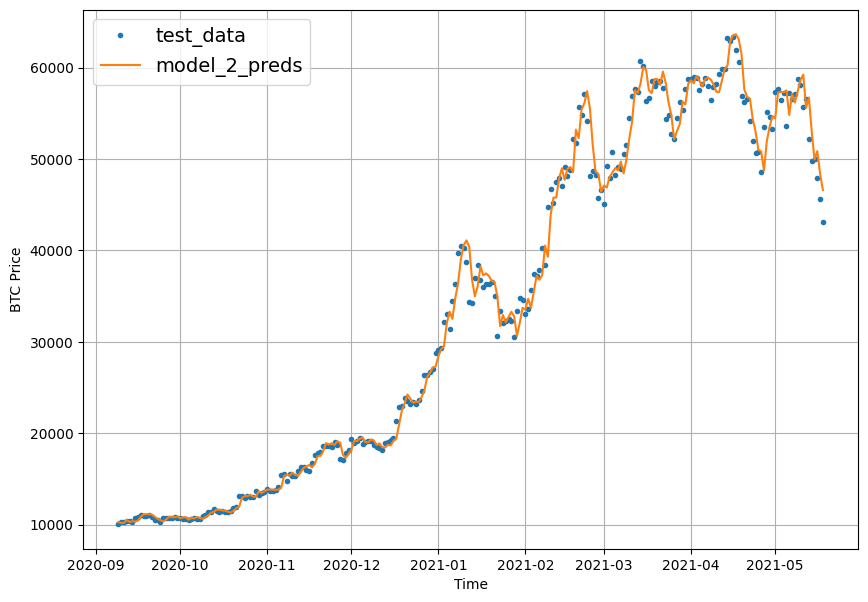

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

#Model 3(window=30, horizon=7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])


Epoch 1: val_loss improved from inf to 3003.89453, saving model to model_experiments/model_3_dense.keras

Epoch 2: val_loss improved from 3003.89453 to 1983.88843, saving model to model_experiments/model_3_dense.keras

Epoch 3: val_loss improved from 1983.88843 to 1918.60938, saving model to model_experiments/model_3_dense.keras

Epoch 4: val_loss improved from 1918.60938 to 1859.65393, saving model to model_experiments/model_3_dense.keras

Epoch 5: val_loss improved from 1859.65393 to 1682.01123, saving model to model_experiments/model_3_dense.keras

Epoch 6: val_loss improved from 1682.01123 to 1625.55249, saving model to model_experiments/model_3_dense.keras

Epoch 7: val_loss improved from 1625.55249 to 1521.89709, saving model to model_experiments/model_3_dense.keras

Epoch 8: val_loss did not improve from 1521.89709

Epoch 9: val_loss improved from 1521.89709 to 1473.20532, saving model to model_experiments/model_3_dense.keras

Epoch 10: val_loss improved from 1473.20532 to 1459

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 644.0228


1253.615478515625

In [ ]:

model_3 = tf.keras.models.load_model("model_experiments/model_3_dense.keras")
model_3.evaluate(test_windows, test_labels)



18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 643.4761


1252.108642578125

In [ ]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9521.489, 9330.712, 9278.765, 9408.425, 9576.905, 9393.034,
        9358.215],
       [9149.979, 9075.91 , 8868.587, 9052.647, 9372.08 , 8996.302,
        9004.768],
       [9032.755, 8700.422, 8867.552, 9024.376, 9124.127, 9115.665,
        8956.336],
       [9281.915, 8775.842, 9217.325, 9277.814, 9385.778, 9554.111,
        8967.177],
       [9166.647, 8726.852, 8940.177, 9093.531, 9225.177, 9204.527,
        8904.71 ]], dtype=float32)>

In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1252.1086,
 'mse': 5394212.0,
 'rmse': 2322.5442,
 'mape': 5.7193837,
 'mase': 2.2280574}

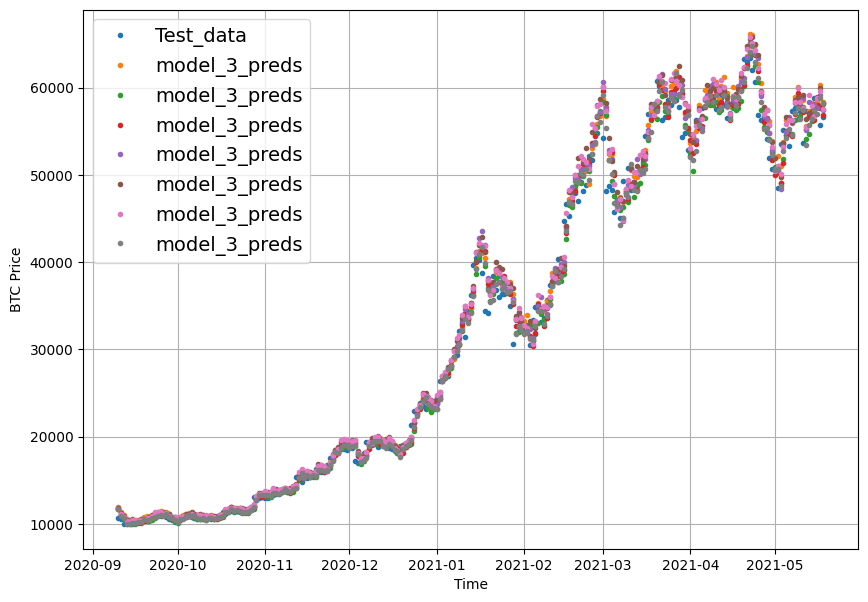

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")


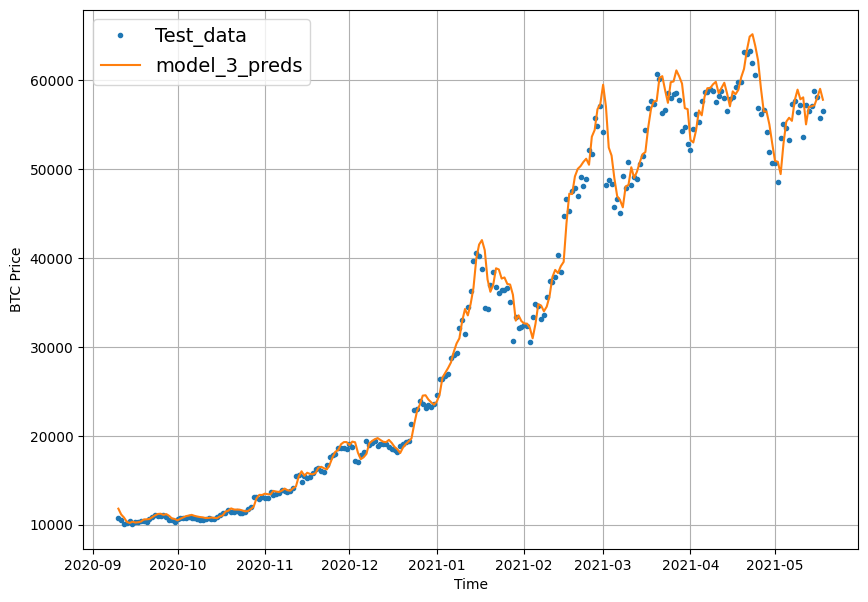

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

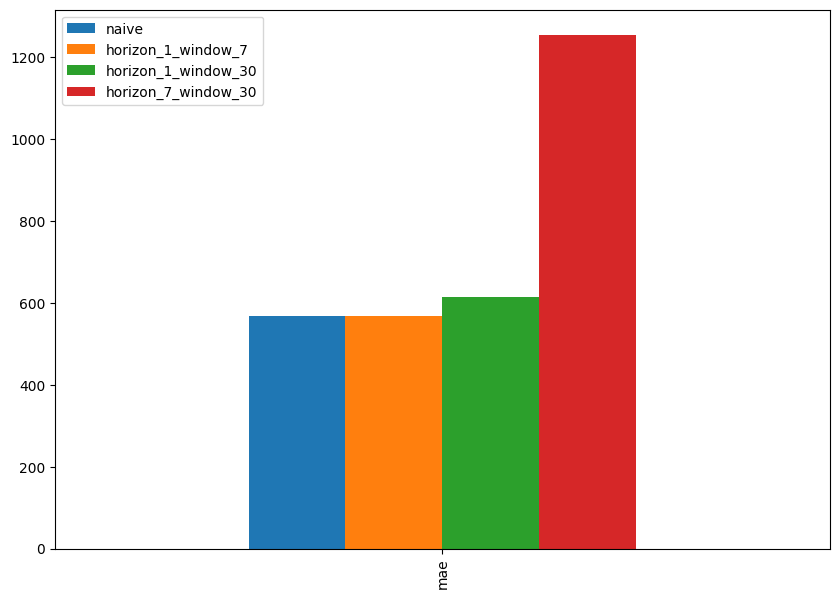

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");


#Model 4 Conv1D

In [ ]:

HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[0].shape

(7,)

In [ ]:
#reshaping it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")


Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:

import tensorflow as tf
from tensorflow.keras import layers

# Set random seed
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Input(shape=(7,)),  # Define the input shape
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),  # Adjust for Conv1D
    layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
    layers.Dense(HORIZON)  # Output layer
], name="model_4_conv1D")

model_4.compile(loss="mae", optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

model_4.save("model_experiments/model_4_conv1D.keras")



Epoch 1: val_loss improved from inf to 1602.58716, saving model to model_experiments/model_4_conv1D.keras

Epoch 2: val_loss improved from 1602.58716 to 1308.73547, saving model to model_experiments/model_4_conv1D.keras

Epoch 3: val_loss improved from 1308.73547 to 1043.13672, saving model to model_experiments/model_4_conv1D.keras

Epoch 4: val_loss improved from 1043.13672 to 997.96075, saving model to model_experiments/model_4_conv1D.keras

Epoch 5: val_loss improved from 997.96075 to 997.14929, saving model to model_experiments/model_4_conv1D.keras

Epoch 6: val_loss did not improve from 997.14929

Epoch 7: val_loss improved from 997.14929 to 974.31531, saving model to model_experiments/model_4_conv1D.keras

Epoch 8: val_loss improved from 974.31531 to 947.84509, saving model to model_experiments/model_4_conv1D.keras

Epoch 9: val_loss improved from 947.84509 to 938.69720, saving model to model_experiments/model_4_conv1D.keras

Epoch 10: val_loss improved from 938.69720 to 925.171

In [ ]:
model_4.summary()

Model: "model_4_conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)                    │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 1, 128)              │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1, 1)                │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,213 (55.52 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,476 (37.02 KB)

In [ ]:

model_4.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 286.2346


568.6768798828125

In [ ]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8892.699, 8790.175, 9002.515, 8801.603, 8748.952, 8729.464,
       8690.813, 8543.743, 8459.954, 8523.138], dtype=float32)>

In [ ]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 568.6768,
 'mse': 1177101.9,
 'rmse': 1084.9432,
 'mape': 2.5680492,
 'mase': 0.99900764}

#Model 5 RNN(LSTM)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the LSTM model without Lambda layer
inputs = layers.Input(shape=(WINDOW_SIZE, 1))  # Adjust input shape to include the extra dimension
x = layers.LSTM(128, activation="relu")(inputs)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit the model
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

# Save the model
model_5.save("model_experiments/model_5_lstm.keras")


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 3150.8374
Epoch 1: val_loss improved from inf to 14816.16699, saving model to model_experiments/model_5_lstm.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 3139.4329 - val_loss: 14816.1670
Epoch 2/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2555.0610
Epoch 2: val_loss improved from 14816.16699 to 1837.67383, saving model to model_experiments/model_5_lstm.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1699.1362 - val_loss: 1837.6738
Epoch 3/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 300.0049
Epoch 3: val_loss improved from 1837.67383 to 1360.38989, saving model to model_experiments/model_5_lstm.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 295.6901 - val_loss: 1360.3899
Epoch 4/100
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 214.2129
Epoch 4: val_loss improved from 1360.38989 to 1009.43927, saving model to model_experiments/model_5_lstm.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - los

In [ ]:
import numpy as np

def preprocess_data(data):
    # Ensure data is in the shape (samples, WINDOW_SIZE, 1)
    if len(data.shape) == 2:
        data = np.expand_dims(data, axis=-1)
    return data

# Pre-process the test_windows
test_windows_processed = preprocess_data(test_windows)

# Load the model and make predictions
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm.keras")
model_5_preds = model_5.predict(test_windows_processed)
model_5_preds[:10]


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


array([[9092.799],
       [8891.165],
       [9017.445],
       [8953.061],
       [8831.973],
       [8829.982],
       [8787.545],
       [8658.872],
       [8564.215],
       [8583.962]], dtype=float32)

In [ ]:
model_5.evaluate(test_windows, test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 327.8022


640.4559936523438

In [ ]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 640.45605,
 'mse': 1420727.0,
 'rmse': 1191.9425,
 'mape': 2.930313,
 'mase': 30.223394}

In [ ]:
bitcoin_prices.head()

Price
Date                 
2013-10-01  123.65499
2013-10-02  125.45500
2013-10-03  108.58483
2013-10-04  118.67466
2013-10-05  121.33866

In [ ]:
#Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [ ]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [ ]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()


Price block_reward
Date                              
2013-10-01  123.65499           25
2013-10-02  125.45500           25
2013-10-03  108.58483           25
2013-10-04  118.67466           25
2013-10-05  121.33866           25

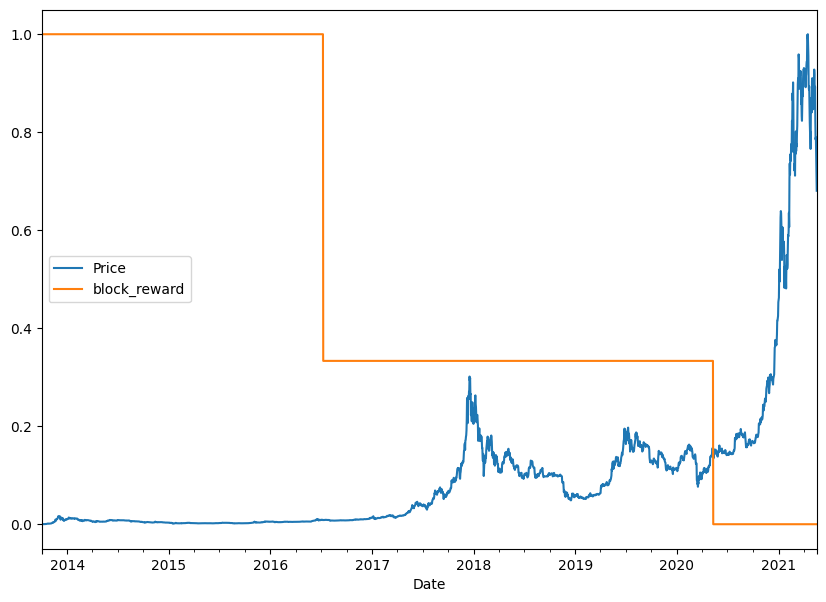

In [ ]:
#block_reward/price
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()


for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

Price block_reward    Price+1    Price+2    Price+3  \
Date                                                                  
2013-10-01  123.65499           25        NaN        NaN        NaN   
2013-10-02  125.45500           25  123.65499        NaN        NaN   
2013-10-03  108.58483           25  125.45500  123.65499        NaN   
2013-10-04  118.67466           25  108.58483  125.45500  123.65499   
2013-10-05  121.33866           25  118.67466  108.58483  125.45500   
2013-10-06  120.65533           25  121.33866  118.67466  108.58483   
2013-10-07  121.79500           25  120.65533  121.33866  118.67466   
2013-10-08  123.03300           25  121.79500  120.65533  121.33866   
2013-10-09  124.04900           25  123.03300  121.79500  120.65533   
2013-10-10  125.96116           25  124.04900  123.03300  121.79500   

              Price+4    Price+5    Price+6    Price+7  
Date                                                    
2013-10-01        NaN        NaN        NaN        NaN  
2013-10-02        NaN        NaN        NaN        NaN  
2013-10-03        NaN        NaN        NaN        NaN  
2013-10-04        NaN        NaN        NaN        NaN  
2013-10-05  123.65499        NaN        NaN        NaN  
2013-10-06  125.45500  123.65499        NaN        NaN  
2013-10-07  108.58483  125.45500  123.65499        NaN  
2013-10-08  118.67466  108.58483  125.45500  123.65499  
2013-10-09  121.33866  118.67466  108.58483  125.45500  
2013-10-10  120.65533  121.33866  118.67466  108.58483

In [ ]:
#remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

block_reward     Price+1     Price+2     Price+3     Price+4  \
Date                                                                       
2013-10-08          25.0  121.794998  120.655327  121.338661  118.674660   
2013-10-09          25.0  123.032997  121.794998  120.655327  121.338661   
2013-10-10          25.0  124.049004  123.032997  121.794998  120.655327   
2013-10-11          25.0  125.961159  124.049004  123.032997  121.794998   
2013-10-12          25.0  125.279663  125.961159  124.049004  123.032997   

               Price+5     Price+6     Price+7  
Date                                            
2013-10-08  108.584831  125.455002  123.654991  
2013-10-09  118.674660  108.584831  125.455002  
2013-10-10  121.338661  118.674660  108.584831  
2013-10-11  120.655327  121.338661  118.674660  
2013-10-12  121.794998  120.655327  121.338661

In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

#Model 6 (Dense Multivariate series)

In [ ]:

tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])


Epoch 1: val_loss improved from inf to 2541.58960, saving model to model_experiments/model_6_dense_multivariate.keras

Epoch 2: val_loss improved from 2541.58960 to 1012.82733, saving model to model_experiments/model_6_dense_multivariate.keras

Epoch 3: val_loss improved from 1012.82733 to 998.81293, saving model to model_experiments/model_6_dense_multivariate.keras

Epoch 4: val_loss improved from 998.81293 to 960.94269, saving model to model_experiments/model_6_dense_multivariate.keras

Epoch 5: val_loss improved from 960.94269 to 949.83771, saving model to model_experiments/model_6_dense_multivariate.keras

Epoch 6: val_loss improved from 949.83771 to 922.21844, saving model to model_experiments/model_6_dense_multivariate.keras

Epoch 7: val_loss improved from 922.21844 to 912.95392, saving model to model_experiments/model_6_dense_multivariate.keras

Epoch 8: val_loss improved from 912.95392 to 874.31677, saving model to model_experiments/model_6_dense_multivariate.keras

Epoch 9: 

In [ ]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate.keras")
model_6.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 281.5333


564.7445678710938

In [ ]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8856.312, 8801.025, 9047.405, 8781.555, 8766.659, 8760.787,
       8660.294, 8558.923, 8465.841, 8537.502], dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results


{'mae': 564.7446,
 'mse': 1160752.5,
 'rmse': 1077.3822,
 'mape': 2.5172741,
 'mase': 0.9920999}

In [ ]:

model_1_results

{'mae': 567.54865,
 'mse': 1167432.0,
 'rmse': 1080.4777,
 'mape': 2.5410879,
 'mase': 0.9970258}

In [ ]:

tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])


Epoch 1: val_loss improved from inf to 1083.42603, saving model to model_experiments/model_6_dense_multivariate.keras

Epoch 2: val_loss improved from 1083.42603 to 951.82208, saving model to model_experiments/model_6_dense_multivariate.keras

Epoch 3: val_loss improved from 951.82208 to 763.01843, saving model to model_experiments/model_6_dense_multivariate.keras

Epoch 4: val_loss improved from 763.01843 to 692.56781, saving model to model_experiments/model_6_dense_multivariate.keras

Epoch 5: val_loss improved from 692.56781 to 653.95270, saving model to model_experiments/model_6_dense_multivariate.keras

Epoch 6: val_loss improved from 653.95270 to 628.83044, saving model to model_experiments/model_6_dense_multivariate.keras

Epoch 7: val_loss improved from 628.83044 to 614.44122, saving model to model_experiments/model_6_dense_multivariate.keras

Epoch 8: val_loss did not improve from 614.44122

Epoch 9: val_loss improved from 614.44122 to 601.12073, saving model to model_experim

In [ ]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate.keras")
model_6.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 282.4326


566.217041015625

In [ ]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 564.7446,
 'mse': 1160752.5,
 'rmse': 1077.3822,
 'mape': 2.5172741,
 'mase': 0.9920999}

In [ ]:
model_1_results

{'mae': 567.54865,
 'mse': 1167432.0,
 'rmse': 1080.4777,
 'mape': 2.5410879,
 'mase': 0.9970258}

#Model-7 (N-beats Algorithm)

In [ ]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)

    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.04641461  0.03879961 -0.5423243   0.34730625 -0.44187987  0.25820178
 -0.67553437]
Forecast: 0.8258700966835022


In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

Price    Price+1    Price+2    Price+3    Price+4    Price+5  \
Date                                                                           
2013-10-08  123.03300  121.79500  120.65533  121.33866  118.67466  108.58483   
2013-10-09  124.04900  123.03300  121.79500  120.65533  121.33866  118.67466   
2013-10-10  125.96116  124.04900  123.03300  121.79500  120.65533  121.33866   
2013-10-11  125.27966  125.96116  124.04900  123.03300  121.79500  120.65533   
2013-10-12  125.92750  125.27966  125.96116  124.04900  123.03300  121.79500   

              Price+6    Price+7  
Date                              
2013-10-08  125.45500  123.65499  
2013-10-09  108.58483  125.45500  
2013-10-10  118.67466  108.58483  
2013-10-11  121.33866  118.67466  
2013-10-12  120.65533  121.33866

In [ ]:

# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:

#Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [ ]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

subtracted = layers.subtract([tensor_1, tensor_2])

added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [ ]:
%%time

tf.random.set_seed(42)

nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

stack_input = layers.Input(shape=(INPUT_SIZE,), name="stack_input")

backcast, forecast = nbeats_block_layer(stack_input)

residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

for i, _ in enumerate(range(N_STACKS-1)):
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals)

  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
             # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 326: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 426: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 2min 10s, sys: 3.16 s, total: 2min 14s
Wall time: 2min 46s


In [ ]:
model_7.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 571.8862 - mae: 571.8862 - mse: 1148138.0000


[571.88623046875, 571.88623046875, 1148138.0]

In [ ]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8948.084, 8819.432, 8996.996, 8868.97 , 8783.04 , 8796.144,
       8681.594, 8567.957, 8510.881, 8544.364], dtype=float32)>

In [ ]:
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 571.8863,
 'mse': 1148138.0,
 'rmse': 1071.512,
 'mape': 2.642043,
 'mase': 1.0046458}

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(model_7,
           to_file='model_7_architecture.png',
           show_shapes=True,
           show_layer_names=True,
           rankdir='TB')  # 'TB' for top-to-bottom layout


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers



model_7.save("model_experiments/model_7_N-BEATS.keras")

# Load the model with custom objects
from tensorflow.keras.utils import get_custom_objects

# Ensure your custom layer is registered
get_custom_objects()['NBeatsBlock'] = NBeatsBlock

model_7 = tf.keras.models.load_model(
    "model_experiments/model_7_N-BEATS.keras",
    custom_objects={'NBeatsBlock': NBeatsBlock}
)

# Evaluate the model
model_7.evaluate(test_windows, test_labels)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'InitialBlock', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'NBeatsBlock_0', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'NBeatsBlock_1', however the layer does

18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 812.5131 - mae: 812.5131 - mse: 2534408.5000


[1663.48876953125, 1663.48876953125, 8767814.0]

#Model 8: Creating an ensemble

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae", "mse", "mape"]):

  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model
      model = tf.keras.Sequential([
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])

      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])

      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [ ]:
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 462: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 562: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 274: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 403: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 503: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 198: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 566: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 666: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 1
Optimizing model by redu

In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))


In [ ]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8745.201 ,  8730.9375,  9151.437 , ..., 50012.18  , 47640.19  ,
        46478.223 ],
       [ 8779.101 ,  8768.187 ,  9069.079 , ..., 50193.918 , 48480.316 ,
        45180.63  ],
       [ 8764.666 ,  8772.429 ,  9111.615 , ..., 49926.523 , 47929.09  ,
        45603.6   ],
       ...,
       [ 8776.597 ,  8833.511 ,  9140.891 , ..., 49968.24  , 48486.094 ,
        46189.95  ],
       [ 8820.058 ,  8776.025 ,  9052.23  , ..., 49790.227 , 47857.92  ,
        46603.055 ],
       [ 8793.606 ,  8746.57  ,  9069.95  , ..., 49762.285 , 48579.41  ,
        45366.94  ]], dtype=float32)>

In [ ]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 568.64453,
 'mse': 1150982.6,
 'rmse': 1072.8385,
 'mape': 2.5642397,
 'mase': 0.99895096}

In [ ]:

#upper and lower bounds of ensemble predictions
def get_upper_lower(preds): #predictions of multiple randomly initialized deep learning neural networks

  std = tf.math.reduce_std(preds, axis=0)
  interval = 1.96 * std

  #the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# the upper and lower bounds of the 95%
lower, upper = get_upper_lower(preds=ensemble_preds)

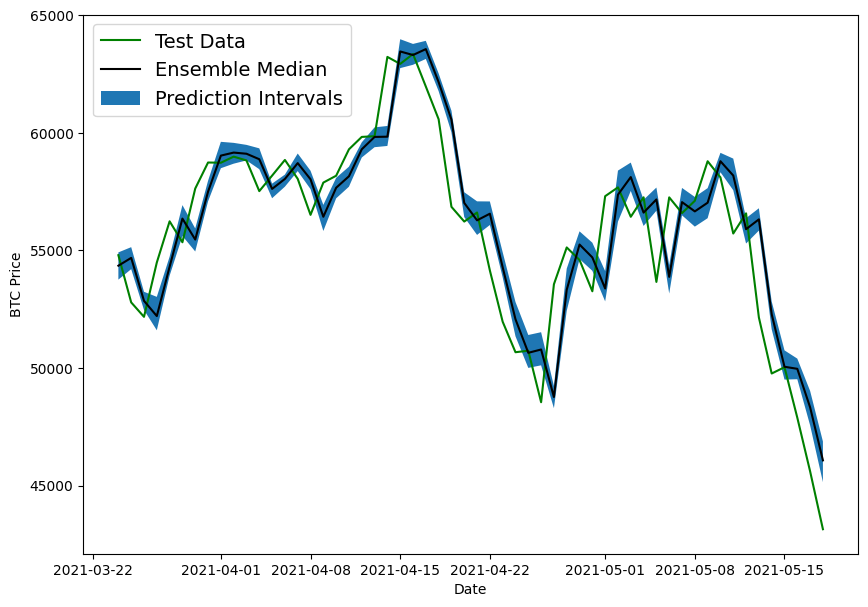

In [ ]:

ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

#Model 9: Train a model on the full historical data to make predictions into future

In [ ]:

bitcoin_prices_windowed.head()

Price block_reward    Price+1    Price+2    Price+3  \
Date                                                                  
2013-10-01  123.65499           25        NaN        NaN        NaN   
2013-10-02  125.45500           25  123.65499        NaN        NaN   
2013-10-03  108.58483           25  125.45500  123.65499        NaN   
2013-10-04  118.67466           25  108.58483  125.45500  123.65499   
2013-10-05  121.33866           25  118.67466  108.58483  125.45500   

              Price+4  Price+5  Price+6  Price+7  
Date                                              
2013-10-01        NaN      NaN      NaN      NaN  
2013-10-02        NaN      NaN      NaN      NaN  
2013-10-03        NaN      NaN      NaN      NaN  
2013-10-04        NaN      NaN      NaN      NaN  
2013-10-05  123.65499      NaN      NaN      NaN

In [ ]:
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [ ]:
#Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

#Batch and prefetch for optimal performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:


tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

In [ ]:

INTO_FUTURE = 14

In [ ]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:

  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)


  for _ in range(into_future):
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55864.4765625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55864.4765625 ] -> Prediction: 52791.9296875

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55864.4765625  52791.9296875 ] -> Prediction: 48350.15625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55864.4765625  52791.9296875  48350.15625   ] -> Prediction: 47655.5625

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55864.4765625
 52791.9296875  48350.15625    47655.5625    ] -> Prediction: 49144.953125

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Pre

In [ ]:
future_forecast[:10]

[55864.477,
 52791.93,
 48350.156,
 47655.562,
 49144.953,
 46299.082,
 47146.016,
 55132.98,
 52193.18,
 46924.246]

In [ ]:

def get_future_dates(start_date, into_future, offset=1):
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [ ]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:

# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast


(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55864.477, 52791.93 , 48350.156, 47655.562, 49144.953,
        46299.082, 47146.016, 55132.98 , 52193.18 , 46924.246, 47583.027,
        50296.54 , 47868.61 , 49284.9  ], dtype=float32))

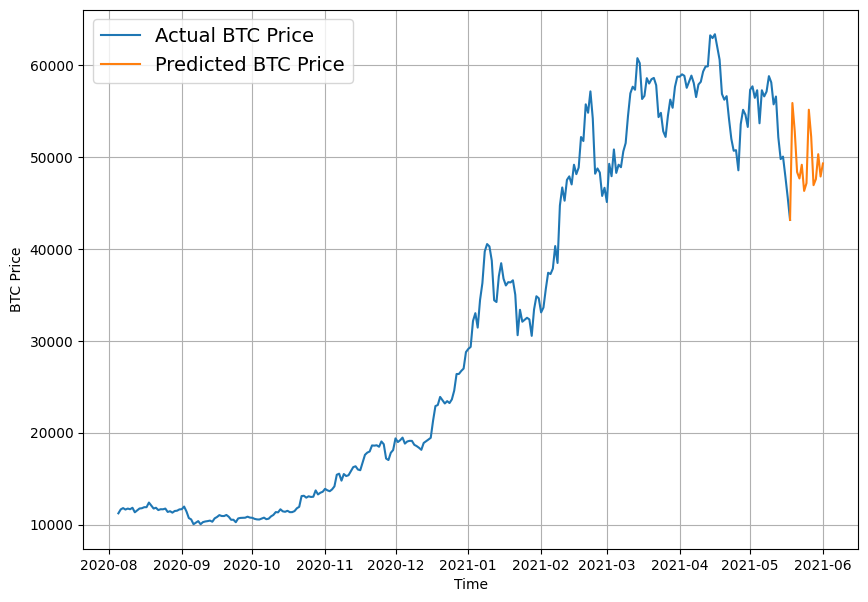

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

#Model 10 (The Turkey Problem)

In [ ]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
#Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

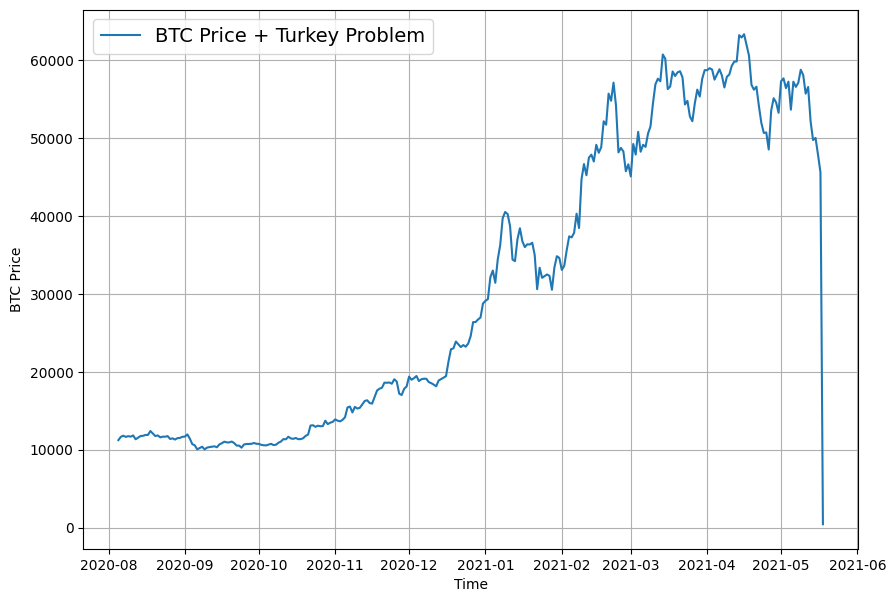

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

In [ ]:
# Create train and test sets
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [ ]:
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])


Epoch 1: val_loss improved from inf to 1150.41321, saving model to model_experiments/model_1_dense.keras

Epoch 2: val_loss improved from 1150.41321 to 1079.44995, saving model to model_experiments/model_1_dense.keras

Epoch 3: val_loss did not improve from 1079.44995

Epoch 4: val_loss improved from 1079.44995 to 1041.76062, saving model to model_experiments/model_1_dense.keras

Epoch 5: val_loss improved from 1041.76062 to 819.45380, saving model to model_experiments/model_1_dense.keras

Epoch 6: val_loss did not improve from 819.45380

Epoch 7: val_loss improved from 819.45380 to 756.57092, saving model to model_experiments/model_1_dense.keras

Epoch 8: val_loss did not improve from 756.57092

Epoch 9: val_loss did not improve from 756.57092

Epoch 10: val_loss did not improve from 756.57092

Epoch 11: val_loss improved from 756.57092 to 716.62982, saving model to model_experiments/model_1_dense.keras

Epoch 12: val_loss did not improve from 716.62982

Epoch 13: val_loss did not im

In [ ]:
turkey_model.evaluate(X_test, y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 324.6403


704.6994018554688

In [ ]:
# Clone the model
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())

checkpoint_callback = create_model_checkpoint(turkey_model._name)

turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[checkpoint_callback])



Epoch 1: val_loss improved from inf to 1285.86804, saving model to model_experiments/Turkey_Model.keras

Epoch 2: val_loss improved from 1285.86804 to 1257.77917, saving model to model_experiments/Turkey_Model.keras

Epoch 3: val_loss improved from 1257.77917 to 1166.78711, saving model to model_experiments/Turkey_Model.keras

Epoch 4: val_loss did not improve from 1166.78711

Epoch 5: val_loss did not improve from 1166.78711

Epoch 6: val_loss improved from 1166.78711 to 977.61420, saving model to model_experiments/Turkey_Model.keras

Epoch 7: val_loss improved from 977.61420 to 864.00964, saving model to model_experiments/Turkey_Model.keras

Epoch 8: val_loss improved from 864.00964 to 745.50372, saving model to model_experiments/Turkey_Model.keras

Epoch 9: val_loss improved from 745.50372 to 719.74872, saving model to model_experiments/Turkey_Model.keras

Epoch 10: val_loss improved from 719.74872 to 714.29565, saving model to model_experiments/Turkey_Model.keras

Epoch 11: val_lo

In [ ]:

turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model.keras")
turkey_model.evaluate(X_test, y_test)



18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 289.9713


640.88037109375

In [ ]:
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8828.376 , 8750.489 , 9030.768 , 8780.055 , 8715.6455, 8717.046 ,
       8683.2705, 8502.628 , 8440.083 , 8522.11  ], dtype=float32)>

In [ ]:
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 640.8804,
 'mse': 4861613.0,
 'rmse': 2204.9065,
 'mape': 21.498068,
 'mase': 26.50634}

In [ ]:

model_1_results

{'mae': 567.54865,
 'mse': 1167432.0,
 'rmse': 1080.4777,
 'mape': 2.5410879,
 'mase': 0.9970258}

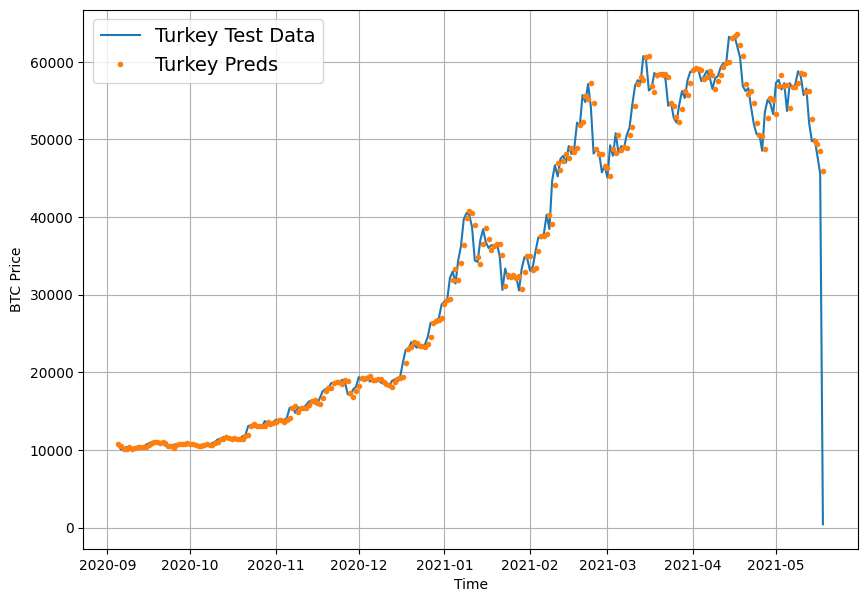

In [ ]:
plt.figure(figsize=(10, 7))
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset);

#Compare Models


In [ ]:
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

mae          mse         rmse       mape  \
naive_model            567.980225  1147547.000  1071.236206   2.516525   
model_1_dense_w7_h1    567.548645  1167432.000  1080.477661   2.541088   
model_2_dense_w30_h1   614.000977  1267812.000  1125.971558   2.830159   
model_3_dense_w30_h7  1252.108643  5394212.000  2322.544189   5.719384   
model_4_CONV1D         568.676819  1177101.875  1084.943237   2.568049   
model_5_LSTM           640.456055  1420727.000  1191.942505   2.930313   
model_6_multivariate   564.744629  1160752.500  1077.382202   2.517274   
model_8_NBEATs         571.886292  1148138.000  1071.511963   2.642043   
model_9_ensemble       568.644531  1150982.625  1072.838501   2.564240   
model_10_turkey        640.880371  4861613.000  2204.906494  21.498068   

                           mase  
naive_model            0.999570  
model_1_dense_w7_h1    0.997026  
model_2_dense_w30_h1   1.073280  
model_3_dense_w30_h7   2.228057  
model_4_CONV1D         0.999008  
model_5_LSTM          30.223394  
model_6_multivariate   0.992100  
model_8_NBEATs         1.004646  
model_9_ensemble       0.998951  
model_10_turkey       26.506340

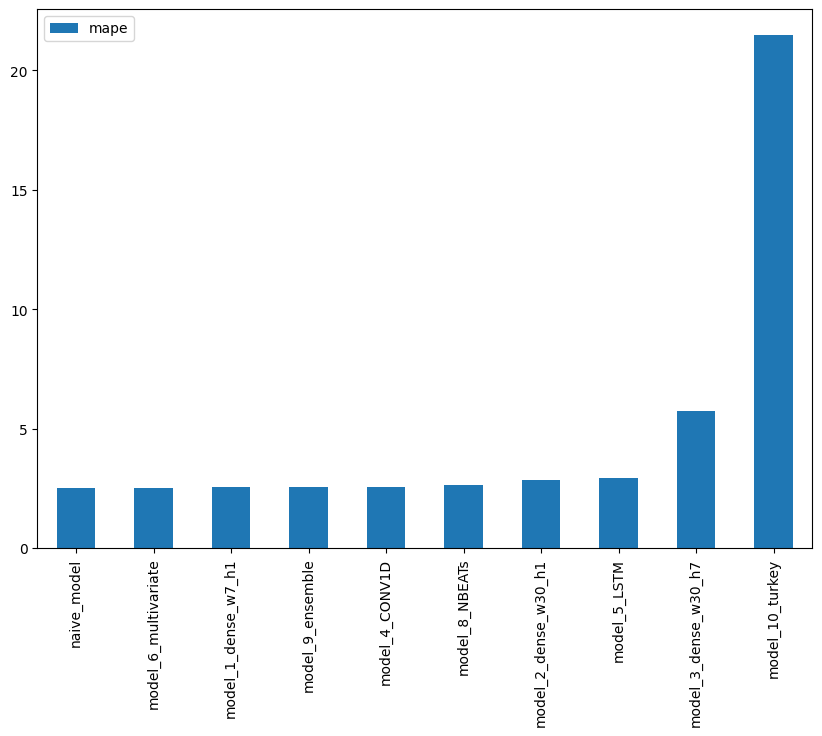

In [ ]:
# Sort model results by MAPE and plot them
model_results[["mape"]].sort_values(by="mape").plot(figsize=(10, 7), kind="bar");

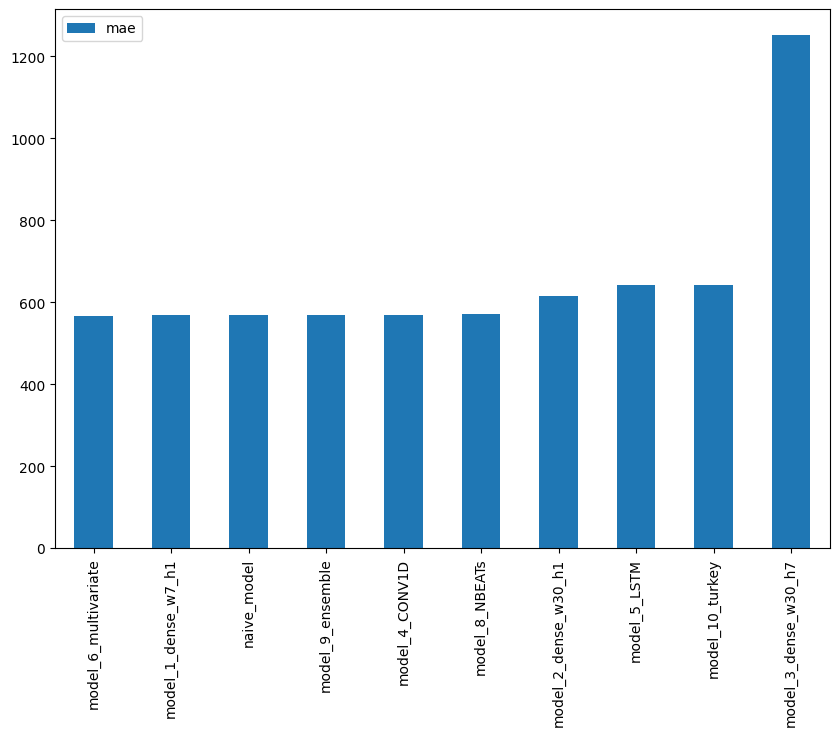

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");

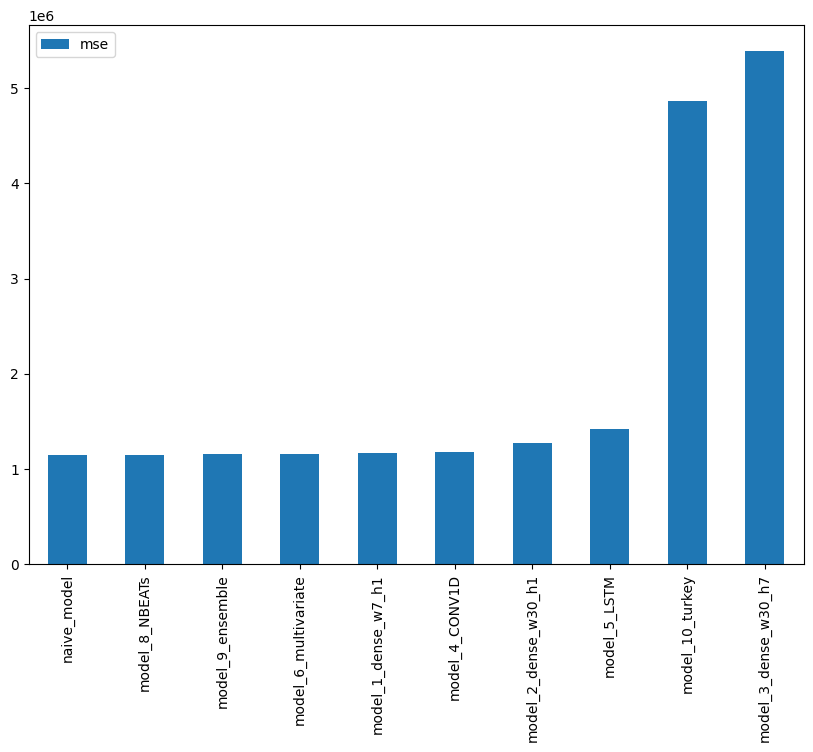

In [ ]:
# Sort model results by MAE and plot them
model_results[["mse"]].sort_values(by="mse").plot(figsize=(10, 7), kind="bar");

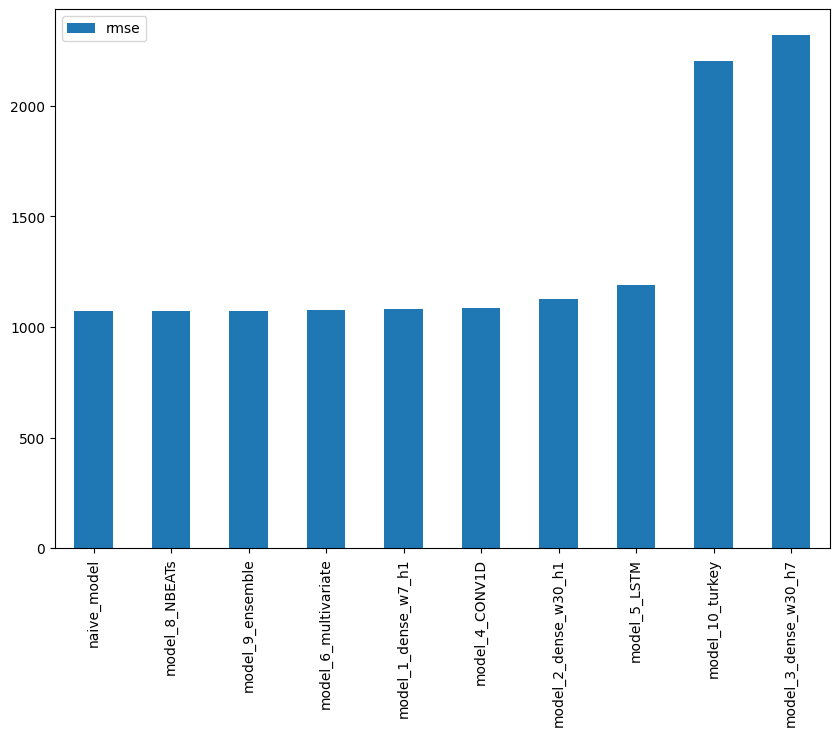

In [ ]:
# Sort model results by MAE and plot them
model_results[["rmse"]].sort_values(by="rmse").plot(figsize=(10, 7), kind="bar");

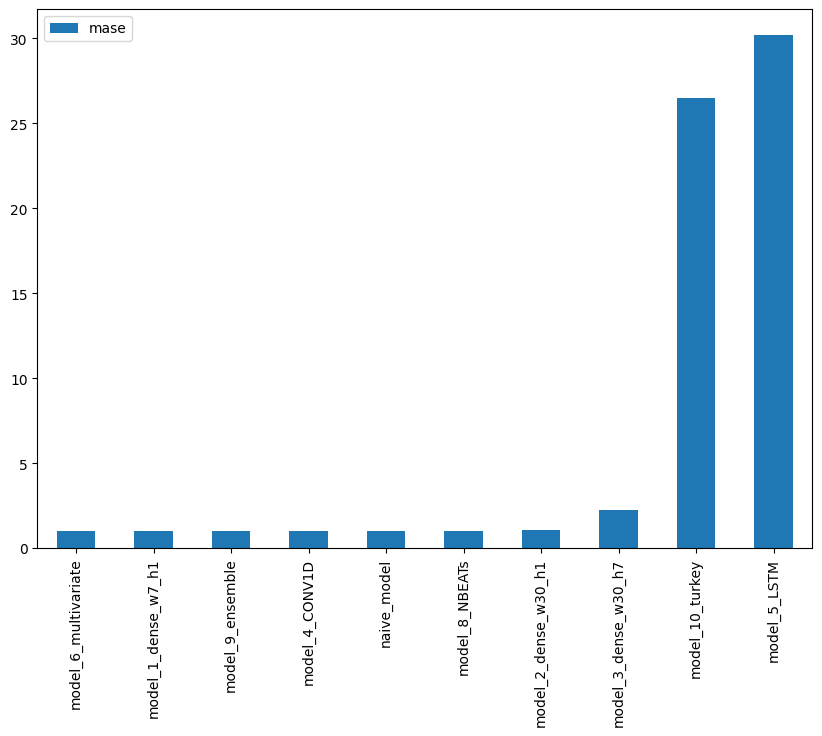

In [ ]:
# Sort model results by MAE and plot them
model_results[["mase"]].sort_values(by="mase").plot(figsize=(10, 7), kind="bar");